In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassRNMulticlase import RNMulticlase

In [3]:
datos = pd.read_csv(DATOS_DIR + 'iris.csv')
datos

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = np.array(datos.iloc[:, :4])
T = np.array(datos['class'])
nomClases = datos['class'].unique()

In [5]:
print("Primeros ejemplos con sus valores de rta.esperados\n")
print("X\n", X[0:5,:])
print("T\n", T[0:5])


Primeros ejemplos con sus valores de rta.esperados

X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
T
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [6]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.50) #, random_state=42)
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)


In [7]:
# imprimir los primeros valores de clase
print("T_train\n", T_train[0:5])

# Crear instancia del OneHotEncoder
enc = preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')

# Ajustar el codificador y transformar los datos
# utilizar fit_transform sobre los datos de entrenamiento y fit sobre los de testeo
T_trainB = enc.fit_transform(T_train.reshape(-1,1)).toarray()
T_testB = enc.transform(T_test.reshape(-1,1)).toarray()

# Imprimir los primeros resultados codificados
print("T_trainB\n", T_trainB[0:5])

# Obtener las categorías detectadas automáticamente
categorias_detectadas = enc.categories_
print("Categorías detectadas:", categorias_detectadas)

T_train
 ['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica']
T_trainB
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Categorías detectadas: [array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]


In [8]:
# Opciones para la función de activación: 'sigmoid', 'tanh' o 'softmax'
# Opciones para la función de costo : 'ECM', 'EC_binaria', 'EC'
# Combinaciones válidas: 'sigmoid'-'ECM', 'sigmoid'-'EC_binaria', 'tanh'-'ECM', 'softmax'-'EC'

funcion = 'softmax'  
funcionCOSTO = 'EC'

if (funcion == 'tanh'):
    T_trainB = 2*T_trainB-1
    T_testB = 2*T_testB-1
    

rn = RNMulticlase(alpha=0.1, n_iter=800, cotaE=1e-06, FUN=funcion, COSTO=funcionCOSTO, random_state=None)
resul = rn.fit(X_train, T_trainB)

In [9]:
print("Pesos obtenidos\n")
print(rn.w_)
print(rn.b_)

Pesos obtenidos

[[-3.27490071  3.5210324  -5.73350482 -5.98557268]
 [ 4.18433885 -2.05283893 -7.10957718 -0.90388991]
 [-1.16115629 -2.4595192  12.57082305  7.94199464]]
[[ 4.95584691e-03]
 [ 7.54731508e+00]
 [-6.47037679e+00]]


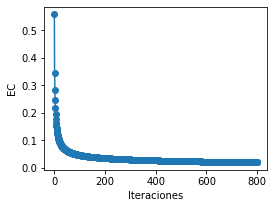

In [10]:
plt.figure(figsize=(4,3))
plt.plot(range(1, len(rn.errors_) + 1), rn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel(funcionCOSTO)
plt.show()

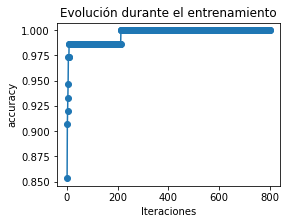

In [11]:
plt.figure(figsize=(4,3))
plt.plot(range(1, len(rn.accuracy_) + 1), rn.accuracy_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('accuracy')
plt.title("Evolución durante el entrenamiento")
plt.show()

In [12]:
#-- accuracy en entrenamiento y testeo ---
acc_Train = rn.accuracy(X_train, T_trainB)
acc_Test = rn.accuracy(X_test, T_testB)
print("acc.Train = %.2f    acc.Test = %.2f" % (acc_Train, acc_Test))

acc.Train = 1.00    acc.Test = 0.96


## Otras funciones de RNMulticlase

In [13]:
# netas de la capa de salida
# netas es una matriz de (Cant_de_ejemplos x Cantidad de neuronas de salida)
netas = rn.net_input(X_test[:5, :])
np.round(netas,2)

array([[-2.000e-02,  1.047e+01, -8.470e+00],
       [ 2.374e+01,  1.011e+01, -3.420e+01],
       [ 2.394e+01,  1.212e+01, -3.554e+01],
       [-1.246e+01,  3.400e+00,  1.059e+01],
       [-5.750e+00,  5.800e+00,  1.630e+00]])

In [14]:
# salida continua de cada neurona
Y_pred = rn.predict_nOut(X_test[:5, :])
print("valores continuos obtenidos")
print(Y_pred)

print("valores redondeados a 3 decimales")
print(np.round(Y_pred,3))

valores continuos obtenidos
[[2.78837752e-05 9.99972110e-01 5.97405745e-09]
 [9.99998799e-01 1.20112664e-06 6.86827418e-26]
 [9.99992687e-01 7.31319079e-06 1.46490371e-26]
 [9.73506720e-11 7.54233799e-04 9.99245766e-01]
 [9.48147074e-06 9.84690999e-01 1.52995200e-02]]
valores redondeados a 3 decimales
[[0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.001 0.999]
 [0.    0.985 0.015]]


In [15]:
Y_pred = rn.predict(X_test)
print("Resultados obtenidos con rn.predict:")
print(Y_pred[:5])


Resultados obtenidos con rn.predict:
[1 0 0 2 1]


In [16]:
print("\nPara obtener valores enteros puede usarse np.argmax para identificar la neurona con salida más alta")
T_test_num = np.argmax(T_testB, axis=1)
print(T_test_num[:5])

print("\nOtra opción es numerizar los valores originales utilizando las categorías detectadas sobre los datos de entrenamiento")
# Crear instancia del LabelEncoder
label_encoder = preprocessing.LabelEncoder()
# Asignar las clases manualmente
label_encoder.classes_ = enc.categories_[0]  #estas son las categorías detectadaspor el OneHotEncoder
T_test_num2 = label_encoder.transform(T_test)
print(T_test_num2[:5])



Para obtener valores enteros puede usarse np.argmax para identificar la neurona con salida más alta
[1 0 0 2 1]

Otra opción es numerizar los valores originales utilizando las categorías detectadas sobre los datos de entrenamiento
[1 0 0 2 1]


In [17]:
nAciertos = np.sum((Y_pred==T_test_num)*1)
print("Total de ejemplos de testeo bien clasificados = ", nAciertos)
print("Tasa de aciertos sobre los datos de testeo (accuracy):%.4f" % (nAciertos/len(Y_pred)))

acc_Test = rn.accuracy(X_test, T_testB)
print("acc.Test = %.4f" % acc_Test)

Total de ejemplos de testeo bien clasificados =  72
Tasa de aciertos sobre los datos de testeo (accuracy):0.9600
acc.Test = 0.9600
